# 제품 이상여부 판별 프로젝트


## 1. 데이터 불러오기


### 필수 라이브러리


In [87]:
import os
from pprint import pprint

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
from tqdm import tqdm

### 데이터 읽어오기


In [88]:
ROOT_DIR = "data"
RANDOM_STATE = 110

# Load data
train_data = pd.read_csv(os.path.join(ROOT_DIR, "train.csv"))
train_data

Wip Line_Dam Process Desc._Dam     Equipment_Dam Model.Suffix_Dam  \
0          IVI-OB6     Dam Dispenser  Dam dispenser #1      AJX75334505   
1          IVI-OB6     Dam Dispenser  Dam dispenser #1      AJX75334505   
2          IVI-OB6     Dam Dispenser  Dam dispenser #2      AJX75334501   
3          IVI-OB6     Dam Dispenser  Dam dispenser #2      AJX75334501   
4          IVI-OB6     Dam Dispenser  Dam dispenser #1      AJX75334501   
...            ...               ...               ...              ...   
40501      IVI-OB6     Dam Dispenser  Dam dispenser #1      AJX75334501   
40502      IVI-OB6     Dam Dispenser  Dam dispenser #2      AJX75334501   
40503      IVI-OB6     Dam Dispenser  Dam dispenser #1      AJX75334501   
40504      IVI-OB6     Dam Dispenser  Dam dispenser #2      AJX75334501   
40505      IVI-OB6     Dam Dispenser  Dam dispenser #1      AJX75334501   

      Workorder_Dam  Insp. Seq No._Dam Insp Judge Code_Dam  \
0        4F1XA938-1                  1                  OK   
1        3KPM0016-2                  1                  OK   
2        4E1X9167-1                  1                  OK   
3        3K1X0057-1                  1                  OK   
4        3HPM0007-1                  1                  OK   
...             ...                ...                 ...   
40501    3J1XF434-2                  1                  OK   
40502    4E1XC796-1                  1                  OK   
40503    4C1XD438-1                  1                  OK   
40504    3I1XA258-1                  1                  OK   
40505    3G1XA501-1                  1                  OK   

       CURE END POSITION X Collect Result_Dam  \
0                                       240.0   
1                                       240.0   
2                                      1000.0   
3                                      1000.0   
4                                       240.0   
...                                       ...   
40501                                   240.0   
40502                                  1000.0   
40503                                   240.0   
40504                                  1000.0   
40505                                   240.0   

       CURE END POSITION X Unit Time_Dam  CURE END POSITION X Judge Value_Dam  \
0                                    NaN                                  NaN   
1                                    NaN                                  NaN   
2                                    NaN                                  NaN   
3                                    NaN                                  NaN   
4                                    NaN                                  NaN   
...                                  ...                                  ...   
40501                                NaN                                  NaN   
40502                                NaN                                  NaN   
40503                                NaN                                  NaN   
40504                                NaN                                  NaN   
40505                                NaN                                  NaN   

       ...  Production Qty Collect Result_Fill2  \
0      ...                                    7   
1      ...                                  185   
2      ...                                   10   
3      ...                                  268   
4      ...                                  121   
...    ...                                  ...   
40501  ...                                  318   
40502  ...                                   14   
40503  ...                                    1   
40504  ...                                  117   
40505  ...                                  320   

       Production Qty Unit Time_Fill2  Production Qty Judge Value_Fill2  \
0                                 NaN                               NaN   
1                                 N

In [89]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40506 entries, 0 to 40505
Columns: 464 entries, Wip Line_Dam to target
dtypes: float64(350), int64(77), object(37)
memory usage: 143.4+ MB


In [90]:
train_data.describe()

Insp. Seq No._Dam  CURE END POSITION X Collect Result_Dam  \
count            40506.0                            40506.000000   
mean                 1.0                              530.370809   
std                  0.0                              369.283055   
min                  1.0                              240.000000   
25%                  1.0                              240.000000   
50%                  1.0                              240.000000   
75%                  1.0                             1000.000000   
max                  1.0                             1000.000000   

       CURE END POSITION X Unit Time_Dam  CURE END POSITION X Judge Value_Dam  \
count                                0.0                                  0.0   
mean                                 NaN                                  NaN   
std                                  NaN                                  NaN   
min                                  NaN                                  NaN   
25%                                  NaN                                  NaN   
50%                                  NaN                                  NaN   
75%                                  NaN                                  NaN   
max                                  NaN                                  NaN   

       CURE END POSITION Z Collect Result_Dam  \
count                            40506.000000   
mean                                 6.320669   
std                                  4.858988   
min                                  2.500000   
25%                                  2.500000   
50%                                  2.500000   
75%                                 12.500000   
max                                 12.500000   

       CURE END POSITION Z Unit Time_Dam  CURE END POSITION Z Judge Value_Dam  \
count                                0.0                                  0.0   
mean                                 NaN                                  NaN   
std                                  NaN                                  NaN   
min                                  NaN                                  NaN   
25%                                  NaN                                  NaN   
50%                                  NaN                                  NaN   
75%                                  NaN                                  NaN   
max                                  NaN                                  NaN   

       CURE END POSITION Θ Collect Result_Dam  \
count                            40506.000000   
mean                               -21.227966   
std                                 87.461776   
min                                -90.000000   
25%                                -90.000000   
50%                                -90.000000   
75%                                 90.000000   
max                                 90.000000   

       CURE END POSITION Θ Unit Time_Dam  CURE END POSITION Θ Judge Value_Dam  \
count                                0.0                                  0.0   
mean                                 NaN                                  NaN   
std                                  NaN                                  NaN   
min                                  NaN                                  NaN   
25%                                  NaN                                  NaN   
50%                                  NaN                                  NaN   
75%                                  NaN                                  NaN   
max                                  NaN                                  NaN   

       ...  PalletID Judge Value_Fill2  Production Qty Collect Result_Fill2  \
count  ...                         0.0                         40506.000000   
mean   ...                         NaN                            73.539648   
std    ...                         NaN                           105.176311   
min 

In [91]:
train_data["target"].value_counts()

target
Normal      38156
AbNormal     2350
Name: count, dtype: int64

In [92]:
test_data = pd.read_csv(os.path.join(ROOT_DIR, "test.csv"))
test_data

Set ID Wip Line_Dam Process Desc._Dam  \
0      0001be084fbc4aaa9d921f39e595961b      IVI-OB6     Dam Dispenser   
1      0005bbd180064abd99e63f9ed3e1ac80      IVI-OB6     Dam Dispenser   
2      000948934c4140d883d670adcb609584      IVI-OB6     Dam Dispenser   
3      000a6bfd02874c6296dc7b2e9c5678a7      IVI-OB6     Dam Dispenser   
4      0018e78ce91343678716e2ea27a51c95      IVI-OB6     Dam Dispenser   
...                                 ...          ...               ...   
17356  ffea508b59934d689b540f95eb3fa730      IVI-OB6     Dam Dispenser   
17357  ffed8923c8a448a98afc641b770be153      IVI-OB6     Dam Dispenser   
17358  fff1e73734da40adbe805359b3efb462      IVI-OB6     Dam Dispenser   
17359  fff8e38bdd09470baf95f71e92075dec      IVI-OB6     Dam Dispenser   
17360  fffa83e0a13d4c2db4fd8bf905b517d4      IVI-OB6     Dam Dispenser   

          Equipment_Dam Model.Suffix_Dam Workorder_Dam  Insp. Seq No._Dam  \
0      Dam dispenser #2      AJX75334501    3J1XF767-1                  1   
1      Dam dispenser #2      AJX75334501    4B1XD472-2                  1   
2      Dam dispenser #1      AJX75334501    3H1XE355-1                  1   
3      Dam dispenser #2      AJX75334501    3L1XA128-1                  1   
4      Dam dispenser #1      AJX75334501    4A1XA639-1                  1   
...                 ...              ...           ...                ...   
17356  Dam dispenser #2      AJX75334501    3K1XB597-1                  1   
17357  Dam dispenser #2      AJX75334501    4A1XB974-1                  1   
17358  Dam dispenser #1      AJX75334501    3L1XA998-1                  1   
17359  Dam dispenser #1      AJX75334501    3F1XC376-1                  1   
17360  Dam dispenser #1      AJX75334501    3J1XC756-1                  1   

      Insp Judge Code_Dam  CURE END POSITION X Collect Result_Dam  \
0                      OK                                  1000.0   
1                      OK                                  1000.0   
2                      OK                                   240.0   
3                      OK                                  1000.0   
4                      OK                                   240.0   
...                   ...                                     ...   
17356                  OK                                  1000.0   
17357                  OK                                  1000.0   
17358                  OK                                   240.0   
17359                  OK                                   240.0   
17360                  OK                                   240.0   

       CURE END POSITION X Unit Time_Dam  ...  \
0                                    NaN  ...   
1                                    NaN  ...   
2                                    NaN  ...   
3                                    NaN  ...   
4                                    NaN  ...   
...                                  ...  ...   
17356                                NaN  ...   
17357                                NaN  ...   
17358                                NaN  ...   
17359                                NaN  ...   
17360                                NaN  ...   

       Production Qty Collect Result_Fill2  Production Qty Unit Time_Fill2  \
0                                      195                             NaN   
1                                       14                             NaN   
2                                       98                             NaN   
3                                       14                             NaN   
4                                        1                             NaN   
...                                    ...                             ...   
17356                                   14                             NaN   
17357                                   12                             NaN   
17358                                    4                             NaN   
17359                

In [93]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17361 entries, 0 to 17360
Columns: 465 entries, Set ID to target
dtypes: float64(351), int64(77), object(37)
memory usage: 61.6+ MB


In [94]:
# 'tt' 칼럼 추가
train_data['tt'] = 'train'
test_data['tt'] = 'test'

In [95]:
train_target = train_data['target']
testSet = test_data['Set ID']
test_target = test_data['target']

In [96]:
test_data = test_data.drop(columns=['Set ID', 'target'])

In [97]:
train_data = train_data.drop(columns = ['target'])

In [98]:
df = pd.concat([train_data, test_data], ignore_index=True)

In [99]:
df.describe()

Insp. Seq No._Dam  CURE END POSITION X Collect Result_Dam  \
count            57867.0                            57867.000000   
mean                 1.0                              530.291185   
std                  0.0                              369.262352   
min                  1.0                              240.000000   
25%                  1.0                              240.000000   
50%                  1.0                              240.000000   
75%                  1.0                             1000.000000   
max                  1.0                             1000.000000   

       CURE END POSITION X Unit Time_Dam  CURE END POSITION X Judge Value_Dam  \
count                                0.0                                  0.0   
mean                                 NaN                                  NaN   
std                                  NaN                                  NaN   
min                                  NaN                                  NaN   
25%                                  NaN                                  NaN   
50%                                  NaN                                  NaN   
75%                                  NaN                                  NaN   
max                                  NaN                                  NaN   

       CURE END POSITION Z Collect Result_Dam  \
count                            57867.000000   
mean                                 6.319621   
std                                  4.858715   
min                                  2.500000   
25%                                  2.500000   
50%                                  2.500000   
75%                                 12.500000   
max                                 12.500000   

       CURE END POSITION Z Unit Time_Dam  CURE END POSITION Z Judge Value_Dam  \
count                                0.0                                  0.0   
mean                                 NaN                                  NaN   
std                                  NaN                                  NaN   
min                                  NaN                                  NaN   
25%                                  NaN                                  NaN   
50%                                  NaN                                  NaN   
75%                                  NaN                                  NaN   
max                                  NaN                                  NaN   

       CURE END POSITION Θ Collect Result_Dam  \
count                            57867.000000   
mean                               -21.246825   
std                                 87.456873   
min                                -90.000000   
25%                                -90.000000   
50%                                -90.000000   
75%                                 90.000000   
max                                 90.000000   

       CURE END POSITION Θ Unit Time_Dam  CURE END POSITION Θ Judge Value_Dam  \
count                                0.0                                  0.0   
mean                                 NaN                                  NaN   
std                                  NaN                                  NaN   
min                                  NaN                                  NaN   
25%                                  NaN                                  NaN   
50%                                  NaN                                  NaN   
75%                                  NaN                                  NaN   
max                                  NaN                                  NaN   

       ...  PalletID Judge Value_Fill2  Production Qty Collect Result_Fill2  \
count  ...                         0.0                         57867.000000   
mean   ...                         NaN                            73.378644   
std    ...                         NaN                           105.008129   
min 

In [100]:
df.isnull().sum()

Wip Line_Dam                         0
Process Desc._Dam                    0
Equipment_Dam                        0
Model.Suffix_Dam                     0
Workorder_Dam                        0
                                 ...  
Receip No Judge Value_Fill2      57867
WorkMode Collect Result_Fill2        0
WorkMode Unit Time_Fill2         57867
WorkMode Judge Value_Fill2       57867
tt                                   0
Length: 464, dtype: int64

In [101]:
# 각 열별 결측치 개수 확인
missing_values_count = (df.isnull().sum())
missing_values_count = missing_values_count/df.shape[0] 
missing_values_ratio = missing_values_count * 100
print(missing_values_ratio)

Wip Line_Dam                       0.0
Process Desc._Dam                  0.0
Equipment_Dam                      0.0
Model.Suffix_Dam                   0.0
Workorder_Dam                      0.0
                                 ...  
Receip No Judge Value_Fill2      100.0
WorkMode Collect Result_Fill2      0.0
WorkMode Unit Time_Fill2         100.0
WorkMode Judge Value_Fill2       100.0
tt                                 0.0
Length: 464, dtype: float64


In [102]:
bins = [0, 20, 40, 60, 70, 80, 90,100]
missing_values_counts = pd.cut(missing_values_ratio, bins=bins).value_counts().sort_index()

print(missing_values_counts)

(0, 20]        0
(20, 40]       3
(40, 60]       0
(60, 70]       0
(70, 80]       5
(80, 90]       0
(90, 100]    278
Name: count, dtype: int64


In [103]:
# 결측치 비율이 90 이상인 열 삭제
threshold = 90
df= df.drop(columns=missing_values_ratio[missing_values_ratio >= threshold].index)

--

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57867 entries, 0 to 57866
Columns: 186 entries, Wip Line_Dam to tt
dtypes: float64(72), int64(77), object(37)
memory usage: 82.1+ MB


In [105]:
# 1. 상수 열 식별
constant_columns = [col for col in df.columns if df[col].nunique() == 1]

# 2. 상수 열 개수와 이름 확인
print(f"Number of constant columns: {len(constant_columns)}")
print(f"Constant columns: {constant_columns}")

Number of constant columns: 40
Constant columns: ['Wip Line_Dam', 'Process Desc._Dam', 'Insp. Seq No._Dam', 'Insp Judge Code_Dam', 'CURE STANDBY POSITION X Collect Result_Dam', 'CURE STANDBY POSITION Z Collect Result_Dam', 'CURE STANDBY POSITION Θ Collect Result_Dam', 'CURE START POSITION Z Collect Result_Dam', 'HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Dam', 'Wip Line_AutoClave', 'Process Desc._AutoClave', 'Equipment_AutoClave', 'Insp. Seq No._AutoClave', 'Insp Judge Code_AutoClave', '1st Pressure Judge Value_AutoClave', '2nd Pressure Judge Value_AutoClave', '3rd Pressure Judge Value_AutoClave', 'GMES_ORIGIN_INSP_JUDGE_CODE Collect Result_AutoClave', 'GMES_ORIGIN_INSP_JUDGE_CODE Judge Value_AutoClave', 'Wip Line_Fill1', 'Process Desc._Fill1', 'Insp. Seq No._Fill1', 'Insp Judge Code_Fill1', 'HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Fill1', 'Wip Line_Fill2', 'Process Desc._Fill2', 'Insp. Seq No._Fill2', 'Insp Judge Code_Fill2', 'CURE END POSITION Θ Collect Result_Fill2'

In [106]:
print(df['Wip Line_Dam'])

0        IVI-OB6
1        IVI-OB6
2        IVI-OB6
3        IVI-OB6
4        IVI-OB6
          ...   
57862    IVI-OB6
57863    IVI-OB6
57864    IVI-OB6
57865    IVI-OB6
57866    IVI-OB6
Name: Wip Line_Dam, Length: 57867, dtype: object


In [107]:
# 3. 상수 열 삭제
df.drop(columns=constant_columns, inplace=True)

# 4. 삭제된 열의 이름 반환
print(f"Deleted columns: {constant_columns}")

Deleted columns: ['Wip Line_Dam', 'Process Desc._Dam', 'Insp. Seq No._Dam', 'Insp Judge Code_Dam', 'CURE STANDBY POSITION X Collect Result_Dam', 'CURE STANDBY POSITION Z Collect Result_Dam', 'CURE STANDBY POSITION Θ Collect Result_Dam', 'CURE START POSITION Z Collect Result_Dam', 'HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Dam', 'Wip Line_AutoClave', 'Process Desc._AutoClave', 'Equipment_AutoClave', 'Insp. Seq No._AutoClave', 'Insp Judge Code_AutoClave', '1st Pressure Judge Value_AutoClave', '2nd Pressure Judge Value_AutoClave', '3rd Pressure Judge Value_AutoClave', 'GMES_ORIGIN_INSP_JUDGE_CODE Collect Result_AutoClave', 'GMES_ORIGIN_INSP_JUDGE_CODE Judge Value_AutoClave', 'Wip Line_Fill1', 'Process Desc._Fill1', 'Insp. Seq No._Fill1', 'Insp Judge Code_Fill1', 'HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Fill1', 'Wip Line_Fill2', 'Process Desc._Fill2', 'Insp. Seq No._Fill2', 'Insp Judge Code_Fill2', 'CURE END POSITION Θ Collect Result_Fill2', 'CURE STANDBY POSITION X Colle

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57867 entries, 0 to 57866
Columns: 146 entries, Equipment_Dam to tt
dtypes: float64(68), int64(62), object(16)
memory usage: 64.5+ MB


In [109]:
df.shape

(57867, 146)

In [110]:
# 숫자형 데이터만 선택
numeric_df = df.select_dtypes(include=[float, int])

# 상관관계 계산
correlation_matrix = numeric_df.corr()

# 상관관계 행렬 출력
print(correlation_matrix)

                                          CURE END POSITION X Collect Result_Dam  \
CURE END POSITION X Collect Result_Dam                                  1.000000   
CURE END POSITION Z Collect Result_Dam                                  1.000000   
CURE END POSITION Θ Collect Result_Dam                                  1.000000   
CURE SPEED Collect Result_Dam                                           0.075891   
CURE START POSITION X Collect Result_Dam                               -1.000000   
...                                                                          ...   
Machine Tact time Collect Result_Fill2                                  0.267969   
PalletID Collect Result_Fill2                                           0.415403   
Production Qty Collect Result_Fill2                                    -0.166167   
Receip No Collect Result_Fill2                                          0.188893   
WorkMode Collect Result_Fill2                                           0.15

In [25]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


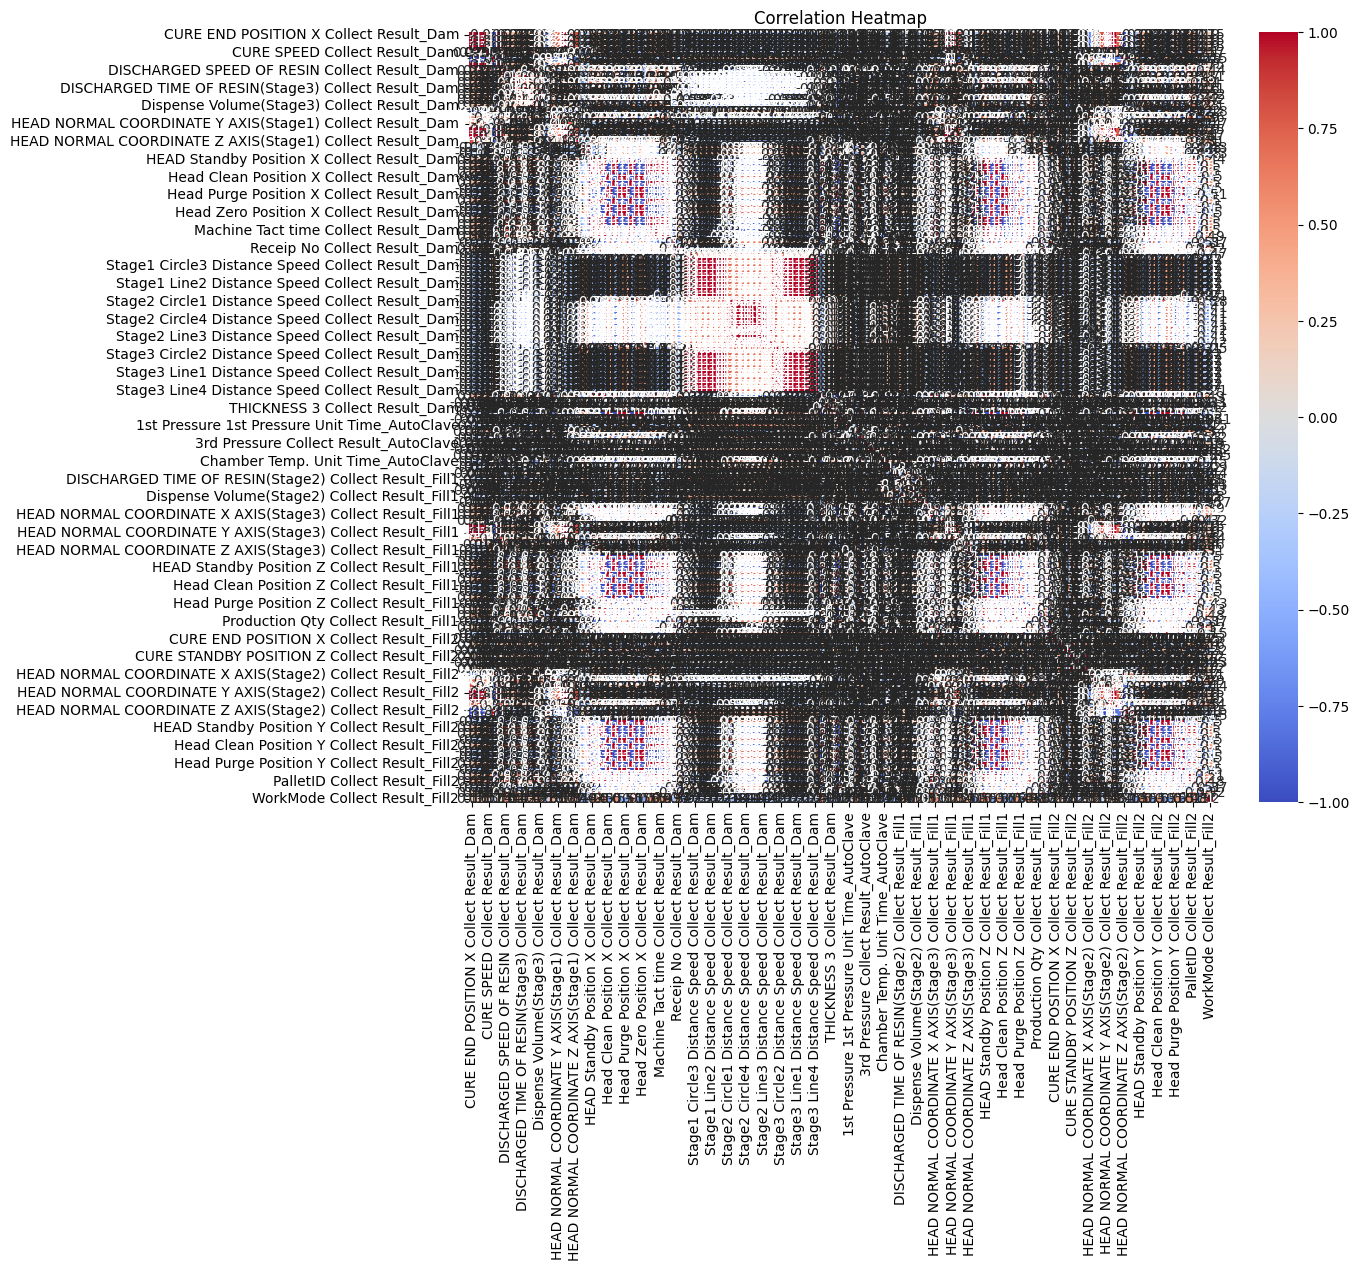

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [112]:
# 상관계수가 0.9 이상인 피처 식별
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
high_corr_features  = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]

print(f"Number of features with correlation higher than 0.9: {len(high_corr_features)}")
print(f"Features with high correlation: {high_corr_features}")

Number of features with correlation higher than 0.9: 85
Features with high correlation: ['CURE END POSITION Z Collect Result_Dam', 'CURE END POSITION Θ Collect Result_Dam', 'CURE START POSITION Θ Collect Result_Dam', 'DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam', 'Dispense Volume(Stage3) Collect Result_Dam', 'HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Dam', 'HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Dam', 'HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Dam', 'HEAD Standby Position Y Collect Result_Dam', 'HEAD Standby Position Z Collect Result_Dam', 'Head Clean Position Y Collect Result_Dam', 'Head Clean Position Z Collect Result_Dam', 'Head Purge Position X Collect Result_Dam', 'Head Purge Position Y Collect Result_Dam', 'Head Purge Position Z Collect Result_Dam', 'Head Zero Position X Collect Result_Dam', 'Head Zero Position Y Collect Result_Dam', 'Head Zero Position Z Collect Result_Dam', 'Machine Tact time Collect Result_Dam', 'PalletID Collect Res

In [113]:
# 상관계수가 높은 피처 삭제
df_reduced = df.drop(columns=high_corr_features)

print(f"Deleted columns due to high correlation: {high_corr_features}")
print(df_reduced.head())

Deleted columns due to high correlation: ['CURE END POSITION Z Collect Result_Dam', 'CURE END POSITION Θ Collect Result_Dam', 'CURE START POSITION Θ Collect Result_Dam', 'DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam', 'Dispense Volume(Stage3) Collect Result_Dam', 'HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Dam', 'HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Dam', 'HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Dam', 'HEAD Standby Position Y Collect Result_Dam', 'HEAD Standby Position Z Collect Result_Dam', 'Head Clean Position Y Collect Result_Dam', 'Head Clean Position Z Collect Result_Dam', 'Head Purge Position X Collect Result_Dam', 'Head Purge Position Y Collect Result_Dam', 'Head Purge Position Z Collect Result_Dam', 'Head Zero Position X Collect Result_Dam', 'Head Zero Position Y Collect Result_Dam', 'Head Zero Position Z Collect Result_Dam', 'Machine Tact time Collect Result_Dam', 'PalletID Collect Result_Dam', 'Stage1 Circle1 Distance Speed Collec

In [114]:
# 삭제할 컬럼의 리스트 확인
print(f"Columns to be deleted: {high_corr_features}")

# 삭제할 컬럼의 개수 확인
print(f"Number of columns to delete: {len(high_corr_features)}")

# df_reduced의 컬럼 개수 확인
print(f"Number of columns in df_reduced after deletion: {df_reduced.shape[1]}")

# 삭제 후 컬럼 목록 확인
print(f"Columns remaining in df_reduced: {df_reduced.columns.tolist()}")


Columns to be deleted: ['CURE END POSITION Z Collect Result_Dam', 'CURE END POSITION Θ Collect Result_Dam', 'CURE START POSITION Θ Collect Result_Dam', 'DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam', 'Dispense Volume(Stage3) Collect Result_Dam', 'HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Dam', 'HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Dam', 'HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Dam', 'HEAD Standby Position Y Collect Result_Dam', 'HEAD Standby Position Z Collect Result_Dam', 'Head Clean Position Y Collect Result_Dam', 'Head Clean Position Z Collect Result_Dam', 'Head Purge Position X Collect Result_Dam', 'Head Purge Position Y Collect Result_Dam', 'Head Purge Position Z Collect Result_Dam', 'Head Zero Position X Collect Result_Dam', 'Head Zero Position Y Collect Result_Dam', 'Head Zero Position Z Collect Result_Dam', 'Machine Tact time Collect Result_Dam', 'PalletID Collect Result_Dam', 'Stage1 Circle1 Distance Speed Collect Result_Dam', 'St

In [115]:
df_reduced.shape

(57867, 61)

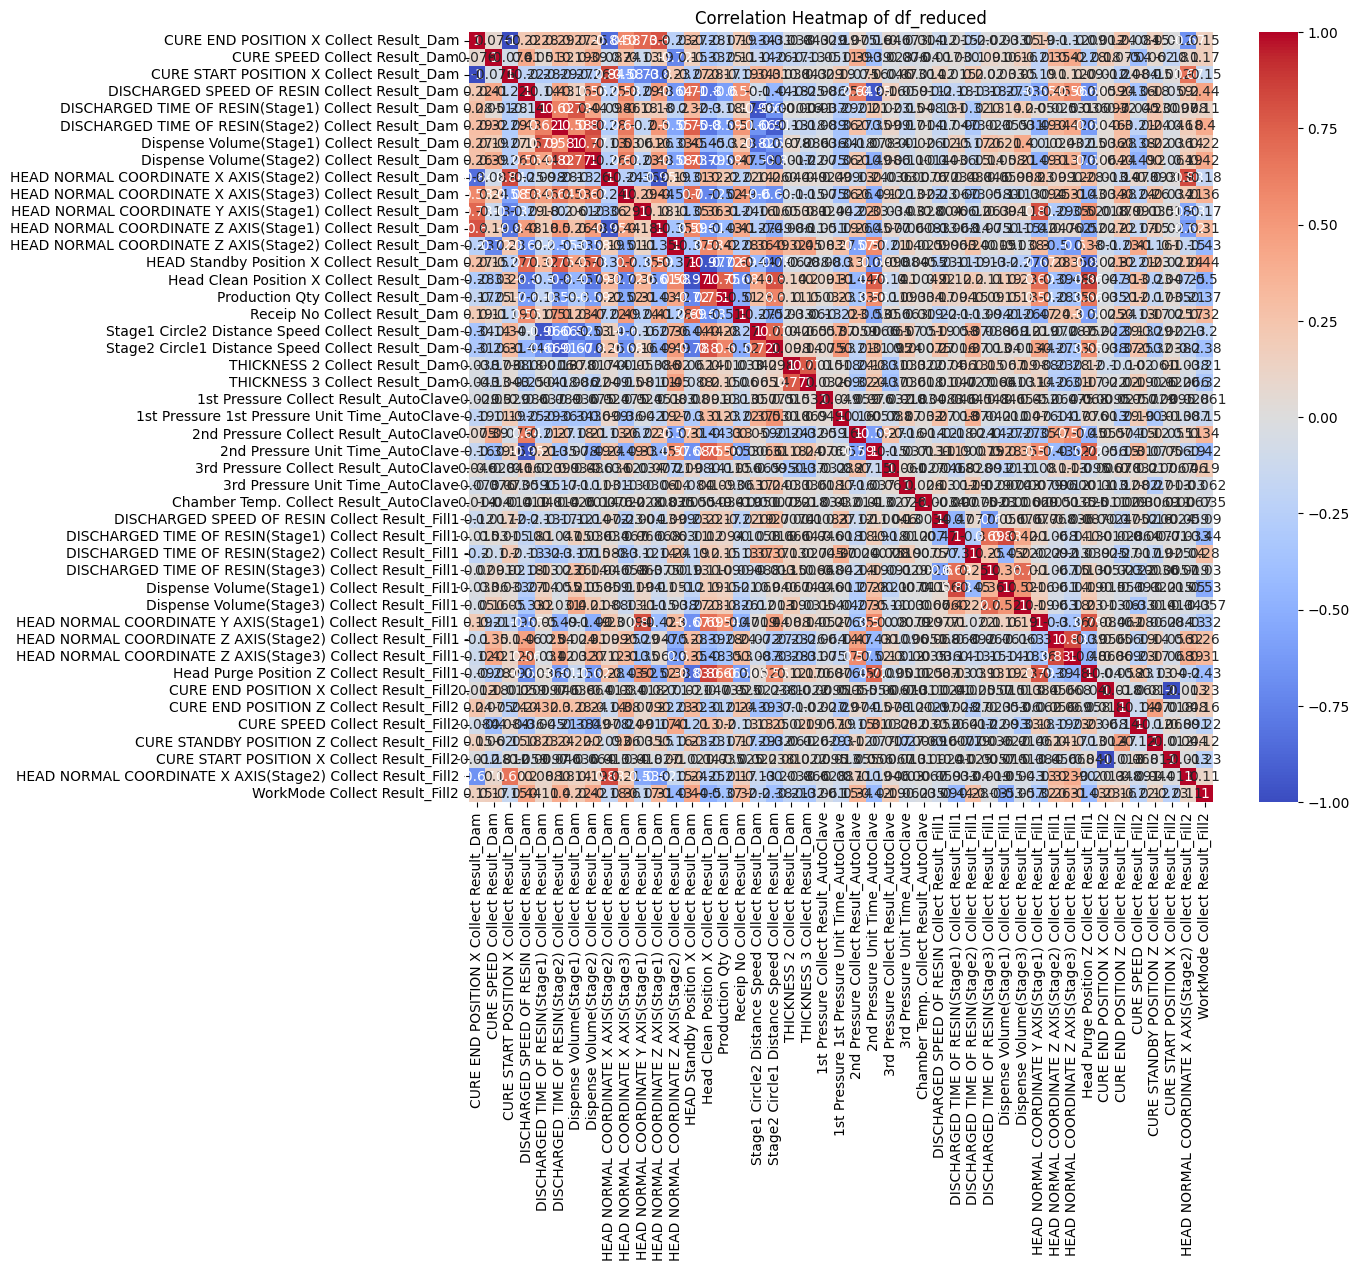

In [116]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# df_reduced에서 숫자형 데이터만 선택하여 상관계수 행렬 계산
correlation_matrix_reduced = df_reduced.select_dtypes(include=['float', 'int']).corr()

# 히트맵 생성
plt.figure(figsize=(12, 10))  # 히트맵 크기 설정
sns.heatmap(correlation_matrix_reduced, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of df_reduced')
plt.show()


In [117]:
#스케일링 진행
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
numeric_df_scaled = scaler.fit_transform(numeric_df)

In [ ]:
df

In [137]:
# 범주형 데이터 열 확인
categorical_columns = df_reduced.select_dtypes(include=['object', 'category']).columns

# 범주형 데이터 열 개수 출력
num_categorical_columns = len(categorical_columns)
print(f"Number of categorical columns: {num_categorical_columns}")
print(f"Categorical columns: {categorical_columns.tolist()}")

Number of categorical columns: 16
Categorical columns: ['Equipment_Dam', 'Model.Suffix_Dam', 'Workorder_Dam', 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam', 'Model.Suffix_AutoClave', 'Workorder_AutoClave', 'Chamber Temp. Judge Value_AutoClave', 'Equipment_Fill1', 'Model.Suffix_Fill1', 'Workorder_Fill1', 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1', 'Equipment_Fill2', 'Model.Suffix_Fill2', 'Workorder_Fill2', 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2', 'tt']


In [138]:
# 범주형 열만 선택하여 새로운 DataFrame 생성
categorical_df = df_reduced[['Equipment_Dam', 'Model.Suffix_Dam', 'Workorder_Dam', 
                     'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam', 
                     'Model.Suffix_AutoClave', 'Workorder_AutoClave', 
                     'Chamber Temp. Judge Value_AutoClave', 'Equipment_Fill1', 
                     'Model.Suffix_Fill1', 'Workorder_Fill1', 
                     'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1', 
                     'Equipment_Fill2', 'Model.Suffix_Fill2', 'Workorder_Fill2', 
                     'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2']]

# 선택된 범주형 열의 데이터 출력
print(categorical_df.head())

      Equipment_Dam Model.Suffix_Dam Workorder_Dam  \
0  Dam dispenser #1      AJX75334505    4F1XA938-1   
1  Dam dispenser #1      AJX75334505    3KPM0016-2   
2  Dam dispenser #2      AJX75334501    4E1X9167-1   
3  Dam dispenser #2      AJX75334501    3K1X0057-1   
4  Dam dispenser #1      AJX75334501    3HPM0007-1   

  HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam  \
0                                                NaN         
1                                              550.3         
2                                                 OK         
3                                              162.4         
4                                                549         

  Model.Suffix_AutoClave Workorder_AutoClave  \
0            AJX75334505          4F1XA938-1   
1            AJX75334505          3KPM0016-2   
2            AJX75334501          4E1X9167-1   
3            AJX75334501          3K1X0057-1   
4            AJX75334501          3HPM0007-1   

  Chamber Tem

In [139]:
# 각 범주형 열에서 고유 값의 개수와 고유 값 출력
for col in categorical_columns:
    unique_vals = df_reduced[col].unique()  # 각 열의 고유 값
    num_unique_vals = len(unique_vals)  # 고유 값의 개수
    print(f"Column: {col}")
    print(f"Number of unique values: {num_unique_vals}")
    print(f"Unique values: {unique_vals}\n")  # 고유 값 출력


Column: Equipment_Dam
Number of unique values: 2
Unique values: ['Dam dispenser #1' 'Dam dispenser #2']

Column: Model.Suffix_Dam
Number of unique values: 7
Unique values: ['AJX75334505' 'AJX75334501' 'AJX75334502' 'AJX75334507' 'AJX75334506'
 'AJX75334508' 'AJX75334503']

Column: Workorder_Dam
Number of unique values: 664
Unique values: ['4F1XA938-1' '3KPM0016-2' '4E1X9167-1' '3K1X0057-1' '3HPM0007-1'
 '3G1X8297-2' '3M1XH425-1' '4A1XB542-4' '3H1X9883-1' '3G1XD171-2'
 '4E1X9168-1' '4A1XC343-1' '3L1XA128-1' '3L1X8574-2' '3GPM0070-1'
 '3G1X4502-2' '3F1X9648-1' '4B1XA868-1' '3L1XB019-1' '4C1X0049-1'
 '4B1XD472-2' '4B1XD691-1' '3G1XB994-1' '4B1XA871-1' '3MPXX030-0001'
 '3H1XD883-1' '3M1XC472-1' '3H1X9881-1' '3I1XB425-1' '4B1X9674-1'
 '3G1XC498-1' '4A1XB975-2' '3M1XF736-1' '4B1XC717-1' '4C1XG294-1'
 '3G1XC759-1' '3J1XF461-1' '3L1XA998-1' '3K1X0791-1' '3F1XB560-1'
 '3J1XC148-1' '4E1X9997-2' '3I1XB274-1' '3K1XA736-1' '4C1XH941-1'
 '4C1XH315-1' '4A1XC346-1' '3L1X9934-1' '4F1X8043-1' '3H1XE851-

-----

In [123]:
df_reduced.shape

(57867, 61)

In [127]:
import pandas as pd

# 'tt' 칼럼을 기준으로 train과 test로 다시 분리
train = df_reduced[df_reduced['tt'] == 'train'].copy()
test = df_reduced[df_reduced['tt'] == 'test'].copy()

# 'tt' 칼럼은 이제 필요 없으므로 삭제
train.drop(columns=['tt'], inplace=True)
test.drop(columns=['tt'], inplace=True)

# train 데이터에 원래 target 값 추가
train['target'] = train_target.values

# test 데이터에 NaN으로 채워진 target 칼럼 추가
test_data_reduced['target'] = float('nan')

# 결과 확인
print("Train data shape:", train.shape)
print("Test data shape:", test.shape)
print(train.head())
print(test.head())


Train data shape: (40506, 61)
Test data shape: (17361, 60)
      Equipment_Dam Model.Suffix_Dam Workorder_Dam  \
0  Dam dispenser #1      AJX75334505    4F1XA938-1   
1  Dam dispenser #1      AJX75334505    3KPM0016-2   
2  Dam dispenser #2      AJX75334501    4E1X9167-1   
3  Dam dispenser #2      AJX75334501    3K1X0057-1   
4  Dam dispenser #1      AJX75334501    3HPM0007-1   

   CURE END POSITION X Collect Result_Dam  CURE SPEED Collect Result_Dam  \
0                                   240.0                            100   
1                                   240.0                             70   
2                                  1000.0                             85   
3                                  1000.0                             70   
4                                   240.0                             70   

   CURE START POSITION X Collect Result_Dam  \
0                                      1030   
1                                      1030   
2                 

In [141]:
test

Equipment_Dam Model.Suffix_Dam Workorder_Dam  \
40506  Dam dispenser #2      AJX75334501    3J1XF767-1   
40507  Dam dispenser #2      AJX75334501    4B1XD472-2   
40508  Dam dispenser #1      AJX75334501    3H1XE355-1   
40509  Dam dispenser #2      AJX75334501    3L1XA128-1   
40510  Dam dispenser #1      AJX75334501    4A1XA639-1   
...                 ...              ...           ...   
57862  Dam dispenser #2      AJX75334501    3K1XB597-1   
57863  Dam dispenser #2      AJX75334501    4A1XB974-1   
57864  Dam dispenser #1      AJX75334501    3L1XA998-1   
57865  Dam dispenser #1      AJX75334501    3F1XC376-1   
57866  Dam dispenser #1      AJX75334501    3J1XC756-1   

       CURE END POSITION X Collect Result_Dam  CURE SPEED Collect Result_Dam  \
40506                                  1000.0                             70   
40507                                  1000.0                             70   
40508                                   240.0                             70   
40509                                  1000.0                             70   
40510                                   240.0                             70   
...                                       ...                            ...   
57862                                  1000.0                             70   
57863                                  1000.0                             70   
57864                                   240.0                             70   
57865                                   240.0                             70   
57866                                   240.0                             70   

       CURE START POSITION X Collect Result_Dam  \
40506                                       280   
40507                                       280   
40508                                      1030   
40509                                       280   
40510                                      1030   
...                                         ...   
57862                                       280   
57863                                       280   
57864                                      1030   
57865                                      1030   
57866                                      1030   

       DISCHARGED SPEED OF RESIN Collect Result_Dam  \
40506                                            10   
40507                                            16   
40508                                            10   
40509                                            10   
40510                                            16   
...                                             ...   
57862                                            10   
57863                                            16   
57864                                            16   
57865                                            10   
57866                                            10   

       DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam  \
40506                                               17.0     
40507                                               14.2     
40508                                                9.7     
40509                                               21.3     
40510                                               13.2     
...                                                  ...     
57862                                               21.3     
57863                                               13.2     
57864                                               13.2     
57865                                                9.7     
57866                                               17.0     

       DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam  \
40506                                                4.9     
40507                                                8.3     
40508                                                4.9     
40509                                               10.6     
40510                  

In [142]:
train

Equipment_Dam Model.Suffix_Dam Workorder_Dam  \
0      Dam dispenser #1      AJX75334505    4F1XA938-1   
1      Dam dispenser #1      AJX75334505    3KPM0016-2   
2      Dam dispenser #2      AJX75334501    4E1X9167-1   
3      Dam dispenser #2      AJX75334501    3K1X0057-1   
4      Dam dispenser #1      AJX75334501    3HPM0007-1   
...                 ...              ...           ...   
40501  Dam dispenser #1      AJX75334501    3J1XF434-2   
40502  Dam dispenser #2      AJX75334501    4E1XC796-1   
40503  Dam dispenser #1      AJX75334501    4C1XD438-1   
40504  Dam dispenser #2      AJX75334501    3I1XA258-1   
40505  Dam dispenser #1      AJX75334501    3G1XA501-1   

       CURE END POSITION X Collect Result_Dam  CURE SPEED Collect Result_Dam  \
0                                       240.0                            100   
1                                       240.0                             70   
2                                      1000.0                             85   
3                                      1000.0                             70   
4                                       240.0                             70   
...                                       ...                            ...   
40501                                   240.0                             70   
40502                                  1000.0                            100   
40503                                   240.0                            100   
40504                                  1000.0                             70   
40505                                   240.0                             70   

       CURE START POSITION X Collect Result_Dam  \
0                                          1030   
1                                          1030   
2                                           280   
3                                           280   
4                                          1030   
...                                         ...   
40501                                      1030   
40502                                       280   
40503                                      1030   
40504                                       280   
40505                                      1030   

       DISCHARGED SPEED OF RESIN Collect Result_Dam  \
0                                                16   
1                                                10   
2                                                16   
3                                                10   
4                                                10   
...                                             ...   
40501                                            10   
40502                                            16   
40503                                            16   
40504                                            10   
40505                                            10   

       DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam  \
0                                                   14.9     
1                                                   21.3     
2                                                   14.7     
3                                                   21.3     
4                                                    9.7     
...                                                  ...     
40501                                               17.0     
40502                                               14.9     
40503                                               14.2     
40504                                                9.7     
40505                                                9.6     

       DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam  \
0                                                    8.4     
1                                                    4.9     
2                                                    8.5     
3                                                    8.4     
4                      

In [143]:
test.shape

(17361, 60)

In [144]:
normal_ratio = 1.0  # 1.0 means 1:1 ratio

df_normal = train[train["target"] == "Normal"]
df_abnormal = train[train["target"] == "AbNormal"]

num_normal = len(df_normal)
num_abnormal = len(df_abnormal)
print(f"  Total: Normal: {num_normal}, AbNormal: {num_abnormal}")

df_normal = df_normal.sample(n=int(num_abnormal * normal_ratio), replace=False, random_state=RANDOM_STATE)
df_concat = pd.concat([df_normal, df_abnormal], axis=0).reset_index(drop=True)
df_concat.value_counts("target")

  Total: Normal: 38156, AbNormal: 2350


target
AbNormal    2350
Normal      2350
Name: count, dtype: int64

In [145]:
X = df_concat.drop('target', axis=1)
y = df_concat['target']

In [146]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [147]:
X_train.isnull().sum()

Equipment_Dam                                                    0
Model.Suffix_Dam                                                 0
Workorder_Dam                                                    0
CURE END POSITION X Collect Result_Dam                           0
CURE SPEED Collect Result_Dam                                    0
CURE START POSITION X Collect Result_Dam                         0
DISCHARGED SPEED OF RESIN Collect Result_Dam                     0
DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam              0
DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam              0
Dispense Volume(Stage1) Collect Result_Dam                       0
Dispense Volume(Stage2) Collect Result_Dam                       0
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam      1127
HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam         0
HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam         0
HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Dam      

In [150]:
from catboost import CatBoostClassifier
import numpy as np

# 모든 범주형 열의 NaN 값을 'NaN' 문자열로 대체
categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns

for col in categorical_columns:
    X_train[col] = X_train[col].astype(str).fillna('NaN')
    X_val[col] = X_val[col].astype(str).fillna('NaN')

# 범주형 변수 인덱스 찾기
categorical_features_indices = np.where(X_train.dtypes == 'object')[0]

# 모델 생성
model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    eval_metric='F1',
    random_seed=42
)

# 모델 학습
model.fit(
    X_train, 
    y_train, 
    cat_features=categorical_features_indices,  # 범주형 열의 인덱스 전달
    eval_set=(X_val, y_val), 
    verbose=100, 
    early_stopping_rounds=100
)

0:	learn: 0.5684912	test: 0.5322581	best: 0.5322581 (0)	total: 17.9ms	remaining: 17.9s
100:	learn: 0.6928721	test: 0.6343042	best: 0.6350915 (88)	total: 1.06s	remaining: 9.46s
200:	learn: 0.7629571	test: 0.6283857	best: 0.6402570 (105)	total: 2.11s	remaining: 8.4s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.6402569593
bestIteration = 105

Shrink model to first 106 iterations.


In [151]:
train.shape

(40506, 61)

In [152]:
X_test.shape

(17361, 60)

In [154]:
# 모든 범주형 열의 NaN 값을 'NaN' 문자열로 대체 (X_test 포함)
categorical_columns = X_test.select_dtypes(include=['object', 'category']).columns

for col in categorical_columns:
    X_test[col] = X_test[col].astype(str).fillna('NaN')

# 이후에 모델 예측 수행
test_pred = model.predict(X_test)
test_pred


array(['AbNormal', 'Normal', 'AbNormal', ..., 'Normal', 'AbNormal',
       'Normal'], dtype=object)

In [155]:
X_test.shape

(17361, 60)

In [156]:
df_sub = pd.read_csv("submission.csv")
df_sub["target"] = test_pred

# 제출 파일 저장
df_sub.to_csv("submission.csv", index=False)